<a href="https://colab.research.google.com/github/YanaAbakumova/Neural_networks/blob/lesson_8/Lesson8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Практическое задание:

1. Обучите нейронную сеть любой архитектуры которой не было на курсе, либо обучите нейронную сеть разобранной архитектуры, но на том датасете, которого не было на уроках. 

2. Сделайте краткий обзор какой-нибудь научной работы посвященной тому или иному алгоритму нейронных сетей, который не рассматривался на курсе. Проведите анализ: Чем отличается выбранная вами на рассмотрение архитектура нейронной сети от других архитектур? В чем плюсы и минусы данной архитектуры? Какие могут возникнуть трудности при применении данной архитектуры на практике?

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D,Reshape,Conv2DTranspose


Использован датасет "apple2orange", из него мне понадобятся только изображения яблок, которые и буду генерировать

In [ ]:
ds_name = 'cycle_gan/apple2orange'

dataset, info = tfds.load(ds_name,split =['trainA[:50%]','trainB[:1%]','testA[:20%]','testB[:1%]'] ,with_info=True, as_supervised=True)

In [ ]:
info

tfds.core.DatasetInfo(
    name='cycle_gan',
    version=2.0.0,
    description='A dataset consisting of images from two classes A and B (For example: horses/zebras, apple/orange,...)',
    homepage='https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=2528,
    splits={
        'testA': 266,
        'testB': 248,
        'trainA': 995,
        'trainB': 1019,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/ZhuPIE17,
      author    = {Jun{-}Yan Zhu and
                   Taesung Park and
                   Phillip Isola and
                   Alexei A. Efros},
      title     = {Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial
                   Networks},
      journal   = {CoRR},
      volume    = {abs/1703.10593},


In [ ]:
trainA = dataset[0]
testA = dataset[2]

In [ ]:
BUFFER_SIZE = 1024
BATCH_SIZE = 16

In [ ]:
def normalize(input_image):
  input_image = tf.cast(input_image, tf.float32) / 255
  return input_image

def load_image(image, label):
  input_image = tf.image.resize(image, [128, 128], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

  input_image= normalize(input_image)

  return input_image

In [ ]:
trainA = trainA.map(load_image)
trainA_dataset = trainA.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
trainA_dataset = trainA_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
trainA_dataset = trainA.batch(BATCH_SIZE)

In [ ]:
testA = testA.map(load_image)
testA_dataset = testA.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
testA_dataset = testA_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
testA_dataset = testA.batch(BATCH_SIZE)

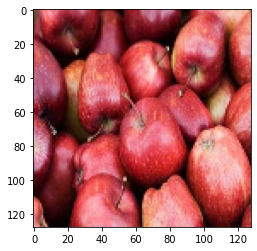

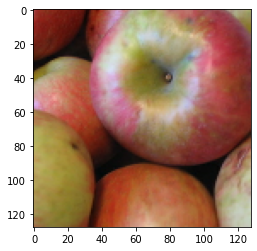

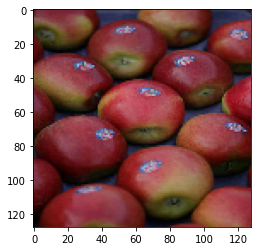

In [ ]:
for image in trainA_dataset.take(1):
  
  sample_image = image
  for i in range(3):
    plt.imshow(sample_image.numpy()[i,:,:,:])
    plt.show()

Пробовала: добавлять больше слоев, каждому слою добавлять batchnornalization и дропаут, MaxPooling2D для разных количеств ядер, больше полносвязных слоев - результат работы модели ухудшился: ошибка работы дискриминатора стремилась к нулю, в то время как ошибка генератора оставалась значительной.

In [ ]:
discriminator = keras.Sequential(
    [
        keras.Input(shape=(128, 128,3)),
        layers.Conv2D(32, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(64, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.GlobalMaxPooling2D(),
        layers.Dense(1),
    ],
    name="discriminator",
)

        #keras.Input(shape=(128, 128,3)),
        #layers.Conv2D(32, (3, 3), strides=(2, 2), padding="same"),
        #layers.LeakyReLU(alpha=0.25),
        #layers.Conv2D(32, (3, 3), strides=(2, 2), padding="same"),
        #layers.LeakyReLU(alpha=0.25),
        #layers.BatchNormalization(),
        #layers.Dropout(0.1),
        #layers.MaxPooling2D(padding='same'),
        #layers.Conv2D(64, (3, 3), strides=(2, 2), padding="same"),
        #layers.LeakyReLU(alpha=0.25),
        #layers.Conv2D(64, (3, 3), strides=(2, 2), padding="same"),
        #layers.LeakyReLU(alpha=0.25),
        #layers.BatchNormalization(),
        #layers.Dropout(0.2),
        #layers.MaxPooling2D(padding='same'),
        #layers.Conv2D(128, (3, 3), strides=(2, 2), padding="same"),
        #layers.LeakyReLU(alpha=0.25),
        #layers.Conv2D(128, (3, 3), strides=(2, 2), padding="same"),
        #layers.LeakyReLU(alpha=0.25),
        #layers.BatchNormalization(),
        #layers.Dropout(0.3),
        #layers.MaxPooling2D(padding='same'),
        #layers.Conv2D(256, (3, 3), strides=(2, 2), padding="same"),
        #layers.LeakyReLU(alpha=0.25),
        #layers.Conv2D(256, (3, 3), strides=(2, 2), padding="same"),
        #layers.LeakyReLU(alpha=0.25),
        #layers.BatchNormalization(),
        #layers.Dropout(0.4),
     
        #layers.Flatten(),
        #layers.Dense(256, activation='relu'),
        #layers.Dense(1),
    #],
    #name="discriminator",
#)


discriminator.summary()

Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
leaky_re_lu_44 (LeakyReLU)   (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
leaky_re_lu_45 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
leaky_re_lu_46 (LeakyReLU)   (None, 16, 16, 128)       0         
_________________________________________________________________
global_max_pooling2d_4 (Glob (None, 128)             

Пробовала: менять размер latent_dim (128 - оптимально), кол-во слоев, добавлять Batchnormalization и Dropout, LeakyRelu заменять на Relu - результат ухудшился.
В качестве последней активационной функции пробовала сигмоид и тангенс - тангенс показал лучший результат.

In [ ]:
latent_dim = 128

generator = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)),
        layers.Dense(16 * 16 * 3),
        layers.LeakyReLU(alpha=0.2),
        layers.Reshape((16, 16, 3)),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(32, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),

        layers.Conv2D(3, (7, 7), padding="same", activation="tanh"),
    ],
    name="generator",
)
        #layers.ReLU(),
        #layers.Reshape((16, 16, 3)),
        #layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"),
        #layers.ReLU(),
        #layers.BatchNormalization(),
        #layers.Dropout(0.2),
        #layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"),
        #layers.ReLU(),
        #layers.BatchNormalization(),
        #layers.Dropout(0.3),
        #layers.Conv2DTranspose(32, (4, 4), strides=(2, 2), padding="same"),
        #layers.ReLU(),
        #layers.BatchNormalization(),
        #layers.Dropout(0.4),
        #layers.Conv2D(3, (7, 7), padding="same", activation="tanh"),
    #],
    #name="generator",
#)

generator.summary()

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 768)               99072     
_________________________________________________________________
leaky_re_lu_47 (LeakyReLU)   (None, 768)               0         
_________________________________________________________________
reshape_5 (Reshape)          (None, 16, 16, 3)         0         
_________________________________________________________________
conv2d_transpose_15 (Conv2DT (None, 32, 32, 128)       6272      
_________________________________________________________________
leaky_re_lu_48 (LeakyReLU)   (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_transpose_16 (Conv2DT (None, 64, 64, 64)        131136    
_________________________________________________________________
leaky_re_lu_49 (LeakyReLU)   (None, 64, 64, 64)        0 

In [ ]:
class GAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(GAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, real_images):
        if isinstance(real_images, tuple):
            real_images = real_images[0]
        # берем случайный пример из скрытого пространства
        batch_size = tf.shape(real_images)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Строим по нему фейковое изображение
        generated_images = self.generator(random_latent_vectors)

        # собрали с реальным в текзор
        combined_images = tf.concat([generated_images, real_images], axis=0)

        # задаем метки 1 и 0 соответственно
        labels = tf.concat(
            [tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0
        )
        # Добавляем шум !!!
        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        # учим discriminator
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        #Выбрали случайный пример в скрытом пространстве
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # собрали метки реальных изображений
        misleading_labels = tf.zeros((batch_size, 1))

        # Учим generator !
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))
        return {"d_loss": d_loss, "g_loss": g_loss}


In [ ]:
class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.normal(shape=(self.num_img, self.latent_dim))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = keras.preprocessing.image.array_to_img(generated_images[i])
            img.save("generated_img_{i}_{epoch}.png".format(i=i, epoch=epoch))


In [ ]:
epochs = 150

gan = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0003),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0003),
    loss_fn=keras.losses.BinaryCrossentropy(from_logits =True),
)

gan.fit(
    trainA_dataset, epochs=epochs, callbacks=[GANMonitor(num_img=3, latent_dim=latent_dim)]
)

Epoch 1/150
32/32 [==============================] - 5s 112ms/step - d_loss: 0.6192 - g_loss: 0.6110
Epoch 2/150
32/32 [==============================] - 4s 109ms/step - d_loss: 0.5404 - g_loss: 1.2708
Epoch 3/150
32/32 [==============================] - 4s 109ms/step - d_loss: 0.6744 - g_loss: 2.1336
Epoch 4/150
32/32 [==============================] - 4s 110ms/step - d_loss: 0.6263 - g_loss: 0.8609
Epoch 5/150
32/32 [==============================] - 4s 109ms/step - d_loss: 0.6241 - g_loss: 0.5992
Epoch 6/150
32/32 [==============================] - 4s 110ms/step - d_loss: 0.6051 - g_loss: 1.0591
Epoch 7/150
32/32 [==============================] - 4s 111ms/step - d_loss: 0.5755 - g_loss: 1.3354
Epoch 8/150
32/32 [==============================] - 4s 111ms/step - d_loss: 0.3655 - g_loss: 1.7460
Epoch 9/150
32/32 [==============================] - 4s 109ms/step - d_loss: 0.5690 - g_loss: 0.8337
Epoch 10/150
32/32 [==============================] - 4s 110ms/step - d_loss: 0.5315 - g_lo

epoch number :  15


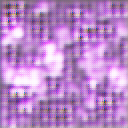

epoch number :  25


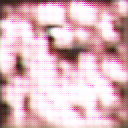

epoch number :  35


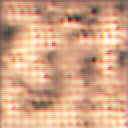

epoch number :  45


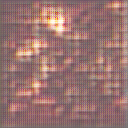

epoch number :  55


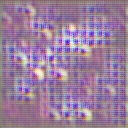

epoch number :  65


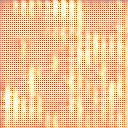

epoch number :  75


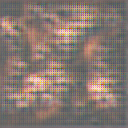

epoch number :  85


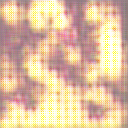

epoch number :  95


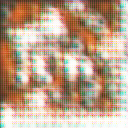

epoch number :  105


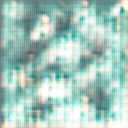

epoch number :  115


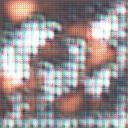

epoch number :  125


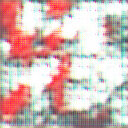

epoch number :  135


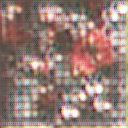

epoch number :  145


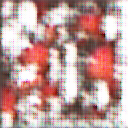

In [ ]:
from IPython.display import Image, display

for i in range(1,15):
  print('epoch number : ', str(i)+'5')
  display(Image("generated_img_0_"+str(i)+"5.png"))

## Dynamic Memory Networks (DMN)

DMN - это архитектура нейронной сети, разработанная для решения NLP задач, в частности, задачи Q&A (когда от системы требуется отвечать на вопросы на естественном языке). Модель DMN получает на вход последовательности данных (информацию в виде предложений, которую модель будет использовать для ответов) и вопросы, формирует эпиздоическую память и генерирует соответствующие ответы. Основная идея в том, что поскольку накапливать всю релевантную информацию в памяти при одном прохождении очень сложно, нужно дать модели доступ к информации столько раз, сколько потребуется. Таким образом, модель сохраняет многочисленные скрытые состояния и использует стратегию, называемую Attention Mechanism, чтобы сделать выбор между ними. Это очень полезно при обработке больших объемов информации (книги, видео), где факты, относящиеся к конкретному вопросу, могут встречаться в разных контекстах и быть далеко друг от друга. Этот метод более эффективен чем попытки закодировать всю информацию в вектор фиксированной длины (как в системах Seq2Seq). 

![dmn.jpg](https://miro.medium.com/max/2400/0*2befvyTwg3R8o92B)


#### Архитектура  DMN состоит из нескольких модулей:
- Input Module: GRU или BigGRU. В этом модуле информация преобразуется в векторы (эмбеддинги). Последнее скрытое состояние каждой последовательности остается доступным. 
- Question Module: GRU, получает вопросы (на которые нужно будет ответить), обрабатывает по словам и выдает вектор. Последнее скрытое состояние также остается доступным.
- Episodic Memory Module: совершает многочисленные прохождения через полученную информацию. При каждом прохождении GRU из этого модуля получает эмбеддинги предложений из Input Module. Здесь эмбеддинги получают веса в соответствии с релевантностью каждого факта по отношению к вопросу. Веса при разных прохождениях могут изменяться: модель замечает взаимосвязи между фактами и при последующих прохождениях увеличивает веса тех, которые связаны с предметом вопроса (учится определять, что важно, а что не важно). Количество итераций может быть задано или определено самой моделью.
- Answer Module: состоит из декодера GRU. На вход при каждой итерации подается предыдущий ответ, сконкатенированный с вектором вопроса. В качестве вывода получается новый ответ. Вывод генерируется с использованием softmax, рассчитанного по всему словарю. 

#### Источники: https://arxiv.org/pdf/1506.07285.pdf
https://towardsdatascience.com/a-step-towards-general-nlp-with-dynamic-memory-networks-2a888376ce8f

#### Вывод: 
DMN хороша для обработки структурированной информации. C неструктурированной информацией, например, SimpleQuestions Dataset), DMN спраялвется хуже, чем более простая модель - LSTM. Также DMN довольно сложный алгоритм, обучение которого требует времени. Поэтому если в приоритете скорость и экономия ресурсов, лучше сделать выбор не в ее пользу. 